# Topic 3 Assignment

## Import the data

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import data from url
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://stackoverflow.com/questions/27696930/using-split-to-split-values-in-an-entire-column-in-a-python-dataframe

url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
df = pd.read_csv(url)

# sanity check 
print(df.head())

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


## Find the domain names

In [4]:
# split the email addresses to get the domain names
# https://www.geeksforgeeks.org/python/python-extract-domain-name-from-email-address/
# https://stackoverflow.com/questions/27696930/using-split-to-split-values-in-an-entire-column-in-a-python-dataframe
# asking ChatGPT for help https://chatgpt.com/share/68f26b95-3ecc-800d-becd-cfa88aad2c91

df['domain'] = df['Email'].str.split('@').str[1]
print(df['domain'].head())





0    example.org
1    example.net
2    example.org
3    example.com
4    example.net
Name: domain, dtype: object


In [ ]:
# do a count on the domain names
# code from co-pilot when i said typed that i wanted to do a count on the domains in the Email column
domain_counts = df['domain'].value_counts()
print(domain_counts)

domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64


## Create the pie chart

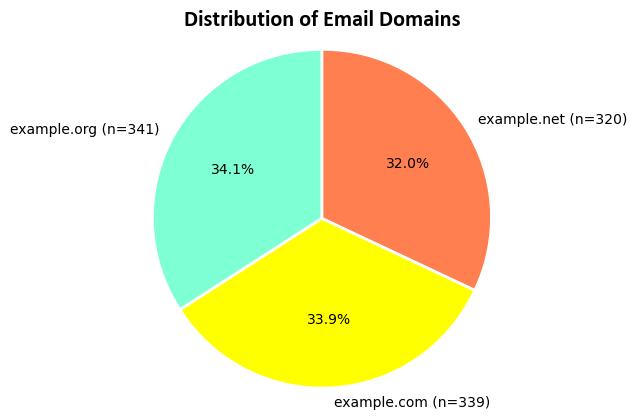

In [8]:
# create pie chart
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# chat with ChatGPT https://chatgpt.com/share/68f26b95-3ecc-800d-becd-cfa88aad2c91

# get the 3 domains for the pie chart
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
domain_counts = df['domain'].value_counts().head(3)  

# assign labels and sizes (above ChatGPT conversation)
labels = [f"{domain} (n={count})" for domain, count in zip(domain_counts.index, domain_counts.values)]
sizes = domain_counts.values

# create the pie chart
# pick nice colours https://datascientyst.com/full-list-named-colors-pandas-python-matplotlib/
# explode all slices for emphasis (matplotlib pie chart documentation linked above)
explode = (0.01, 0.01, 0.01) 
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors=['aquamarine', 'yellow', 'coral'])

# make the pie chart circular
ax.axis('equal')

# add title, with bold italic font https://matplotlib.org/stable/users/explain/text/text_props.html
plt.title('Distribution of Email Domains', fontweight='bold', family='calibri', fontsize=16)
plt.show()